In [59]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.tree import plot_tree
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Ridge,Lasso
from sklearn.neighbors import KNeighborsRegressor
from math import sqrt
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, ParameterGrid, ParameterSampler
from sklearn.pipeline import Pipeline

In [60]:
url = "https://raw.githubusercontent.com/Mateo486/Housing-Market-Capstone/main/miami-housing%5B1%5D.csv"
data = pd.read_csv(url)

data.head(5)

,LATITUDE,LONGITUDE,PARCELNO,SALE_PRC,LND_SQFOOT,TOT_LVG_AREA,SPEC_FEAT_VAL,RAIL_DIST,OCEAN_DIST,WATER_DIST,CNTR_DIST,SUBCNTR_DI,HWY_DIST,age,avno60plus,month_sold,structure_quality
0,25.891031,-80.160561,622280070620,440000.0,9375,1753,0,2815.9,12811.4,347.6,42815.3,37742.2,15954.9,67,0,8,4
1,25.891324,-80.153968,622280100460,349000.0,9375,1715,0,4359.1,10648.4,337.8,43504.9,37340.5,18125.0,63,0,9,4
2,25.891334,-80.153740,622280100470,800000.0,9375,2276,49206,4412.9,10574.1,297.1,43530.4,37328.7,18200.5,61,0,2,4
3,25.891765,-80.152657,622280100530,988000.0,12450,2058,10033,4585.0,10156.5,0.0,43797.5,37423.2,18514.4,63,0,9,4
4,25.891825,-80.154639,622280100200,755000.0,12800,1684,16681,4063.4,10836.8,326.6,43599.7,37550.8,17903.4,42,0,7,4


In [61]:
X = data[['LND_SQFOOT','TOT_LVG_AREA','SPEC_FEAT_VAL','RAIL_DIST',
          'OCEAN_DIST','WATER_DIST',
        'CNTR_DIST','SUBCNTR_DI','HWY_DIST','age','structure_quality']]
y = data['SALE_PRC']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, 
                                                    random_state = 42)


In [62]:
# Setup the pipeline
pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler()),
    ('regressor', DecisionTreeRegressor(random_state=42))
])

# Fit the pipeline on the training data
pipeline.fit(X_train, y_train)



Pipeline(steps=[('imputer', SimpleImputer()), ('scaler', StandardScaler()),
                ('regressor', DecisionTreeRegressor(random_state=42))])

In [63]:
regressors = [
    KNeighborsRegressor(),
    DecisionTreeRegressor(),
    LinearRegression(),
    Lasso(),
    Ridge(),
]

In [64]:
head = 10
for model in regressors[:head]:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(model)
    
    
    print("\tMean absolute error:", sqrt(mean_squared_error(y_test, y_pred)))
    print("\tR2 score:", r2_score(y_test, y_pred))
    print("y predicted")
    print(y_pred)
    print()

KNeighborsRegressor()
	Mean absolute error: 134584.16344757593
	R2 score: 0.8160566403948959
y predicted
[372000. 311580. 302200. ... 387180. 594560. 232000.]

DecisionTreeRegressor()
	Mean absolute error: 131763.06599067242
	R2 score: 0.8236873068177921
y predicted
[318000. 318900. 345000. ... 380000. 639700. 120000.]

LinearRegression()
	Mean absolute error: 177070.09819367164
	R2 score: 0.681590034374707
y predicted
[371059.67033    429217.28177397 440006.88514489 ... 401891.43442312
 677263.01206354 -23296.98730791]

Lasso()
	Mean absolute error: 177070.10235219233
	R2 score: 0.6815900194188849
y predicted
[371059.67543386 429218.32214921 440005.90057698 ... 401891.19693197
 677263.37375436 -23296.97526813]

Ridge()
	Mean absolute error: 177070.12073317432
	R2 score: 0.6815899533129941
y predicted
[371059.28828411 429223.1859085  440001.54667745 ... 401890.33186122
 677265.15057844 -23296.95762081]



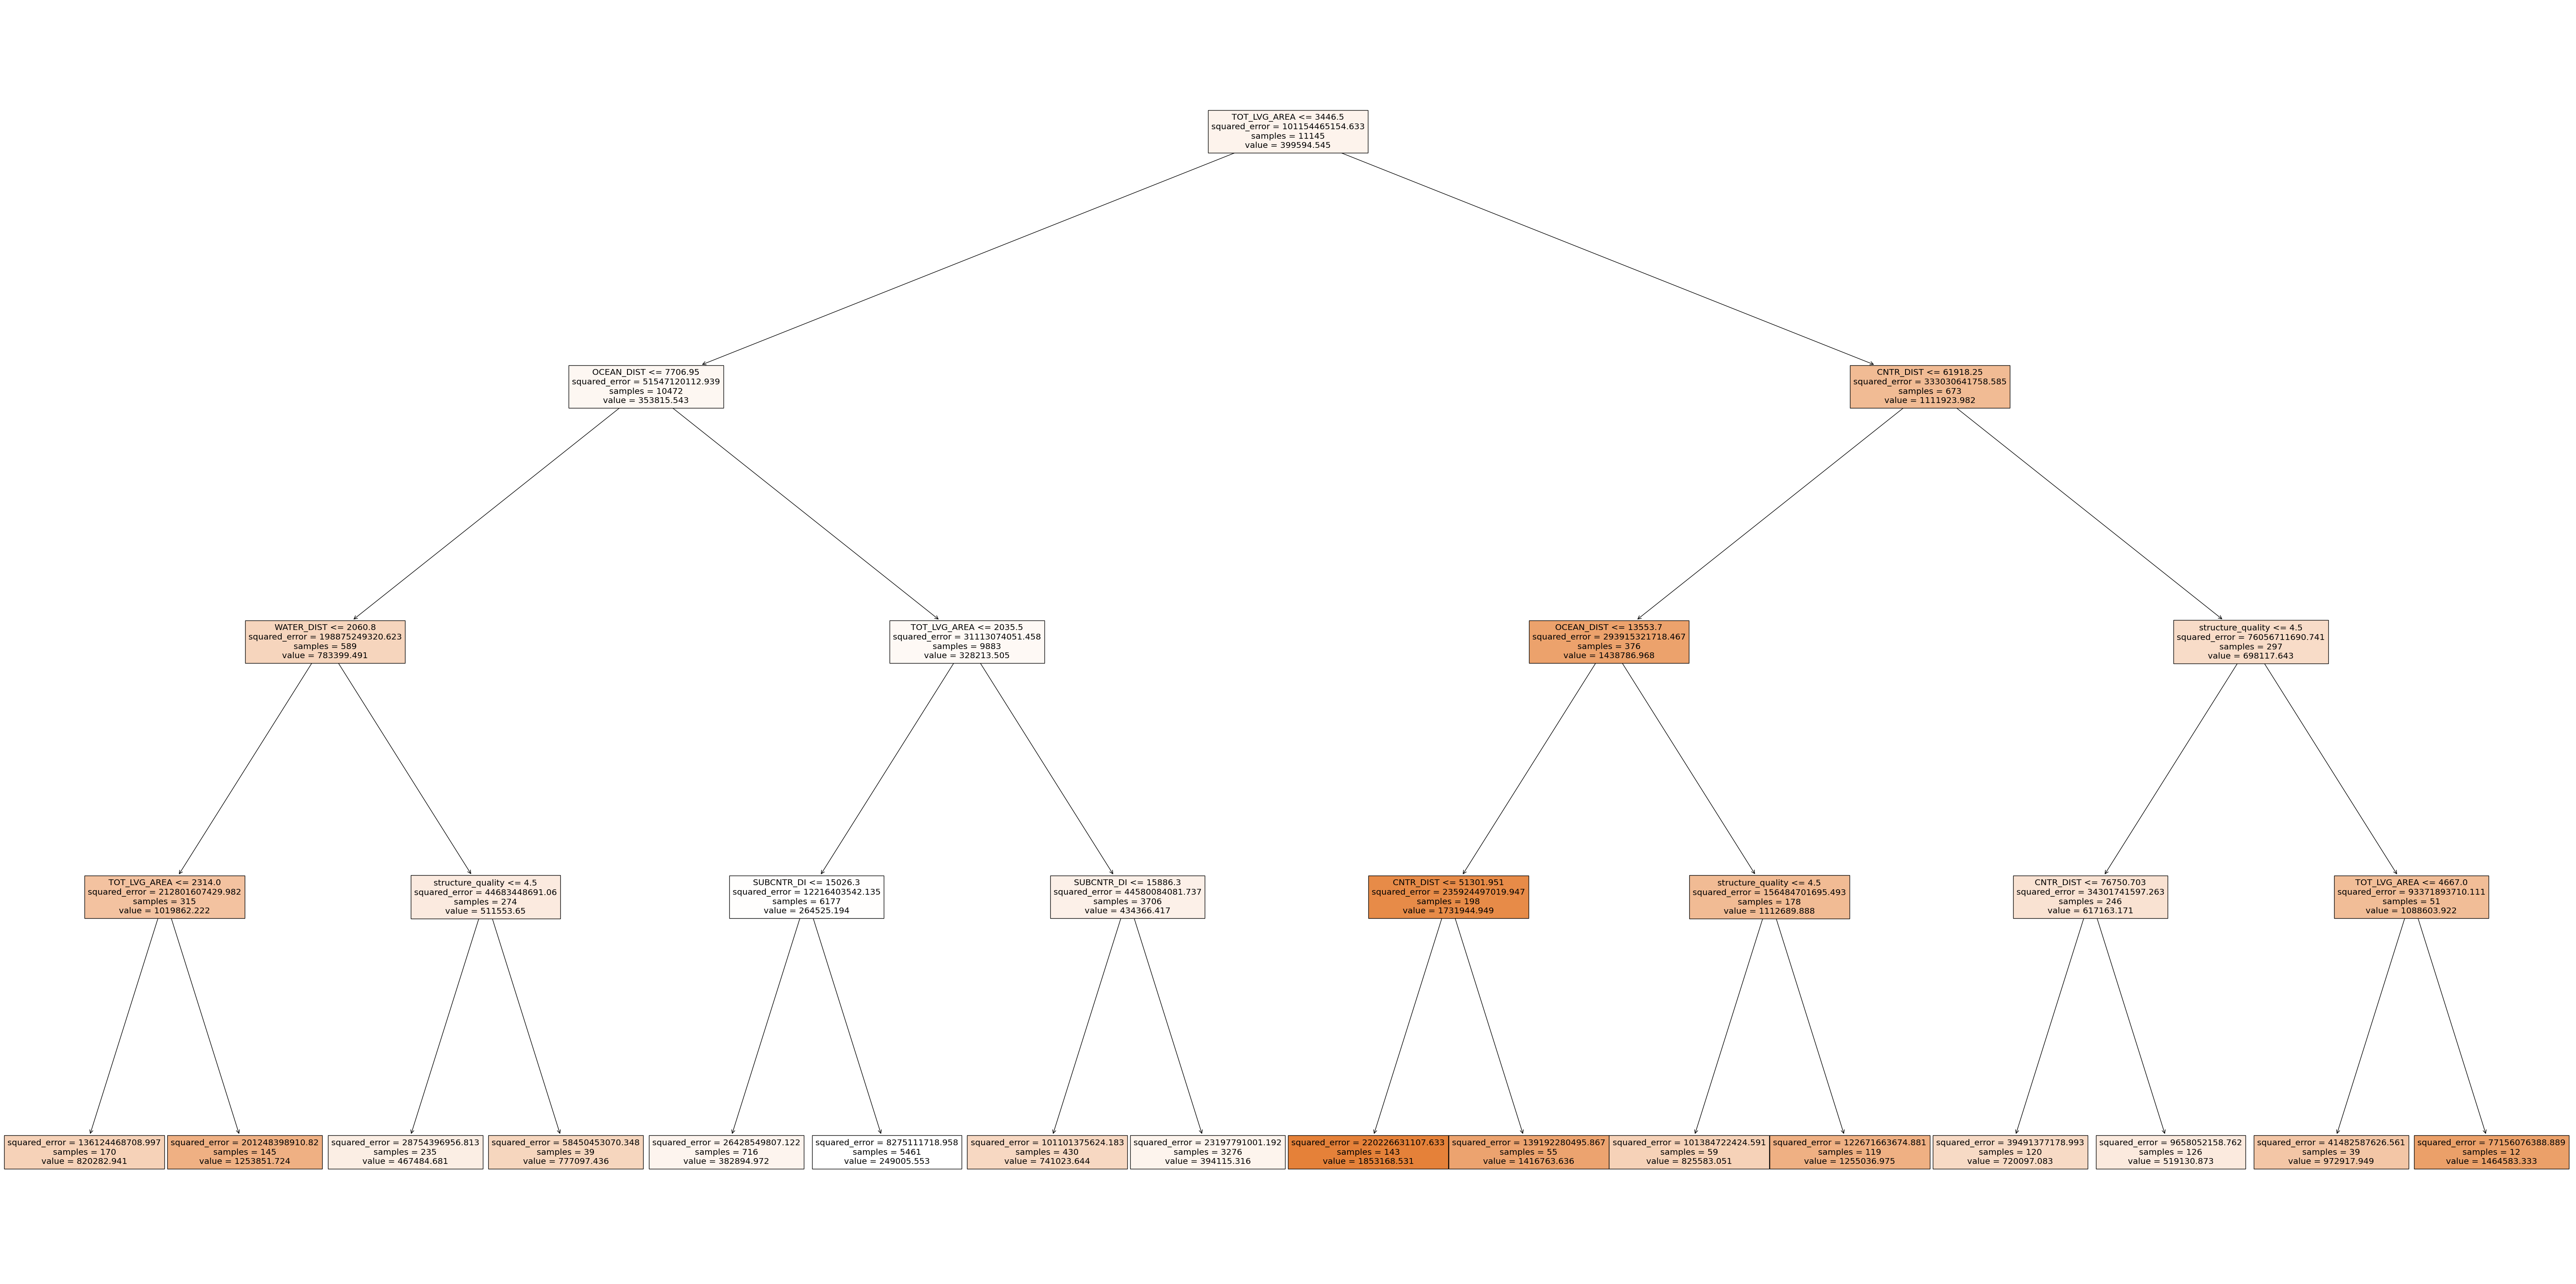

In [65]:
param_grid = {
    'max_depth':[2, 3, 4],
    'max_features':[2, 3, 4, 5, 6, 'sqrt', 'log2', None],
    'min_samples_split': [2,5,10,30]
}

grid_search = GridSearchCV(DecisionTreeRegressor(), param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

best_model = grid_search.best_estimator_

plt.figure(figsize=(80, 40))
plot_tree(best_model, feature_names=X.columns.tolist(), filled=True)
plt.show()


In [66]:
ylist = y.tolist()
ylist = [int(x) for x in ylist]
y_pred_int = [int(x) for x in y_pred]

def compute_SSRes(y_true, predicted):
    sumresiduals = 0 
    for true_val, pred_val in zip(y_true, predicted):
        residual = true_val - pred_val
        sumresiduals += residual ** 2 
    return sumresiduals

SSRes = compute_SSRes(ylist, y_pred_int)
print("Sum of Squared Residuals (SSRes):", SSRes)


Sum of Squared Residuals (SSRes): 663959299738026


In [67]:
import tkinter as tk

#X = data[['LND_SQFOOT','TOT_LVG_AREA','SPEC_FEAT_VAL','RAIL_DIST','OCEAN_DIST','WATER_DIST',
  #      'CNTR_DIST','SUBCNTR_DI','HWY_DIST','age','structure_quality']]

def pre_input(input_data):
    input_array = np.array(input_data).reshape(1, -1)
    input_scaled = sc_X.transform(input_array)
    return input_scaled

def predict_house_price(input_data):
    input_scaled = pre_input(input_data)
    predicted_price = best_model.predict(input_scaled)
    return predicted_price[0]

def display_info():
    # Collecting values from each entry
    values = [
        float(lnd_sqfoot_entry.get()),
        float(tot_lvg_area_entry.get()),
        float(spec_feat_val_entry.get()),
        float(rail_dist_entry.get()),
        float(ocean_dist_entry.get()),
        float(water_dist_entry.get()),
        float(cntr_dist_entry.get()),
        float(subcntr_di_entry.get()),
        float(hwy_dist_entry.get()),
        float(age_entry.get()),
        float(structure_quality_entry.get())
    ]

    # Pass the input data to predict_house_price
    predicted_price = predict_house_price(values)
    
    # Updating the result label to display the predicted price
    result_label.config(text=f"Predicted Price: {predicted_price}")

    



# Create the main window
root = tk.Tk()
root.title("Age and Height")

# Create a frame for input fields
input_frame = tk.Frame(root)
input_frame.pack(padx=10, pady=10)

# Age input
tk.Label(input_frame, text="LND_SQFOOT:").grid(row=0, column=0, pady=5)
lnd_sqfoot_entry = tk.Entry(input_frame)
lnd_sqfoot_entry.grid(row=0, column=1, pady=5)

# Height input
tk.Label(input_frame, text="TOT_LVG_AREA:").grid(row=1, column=0, pady=5)
tot_lvg_area_entry = tk.Entry(input_frame)
tot_lvg_area_entry.grid(row=1, column=1, pady=5)

# Adding unique variables for each input and fixing row indices
tk.Label(input_frame, text="SPEC_FEAT_VAL:").grid(row=2, column=0, pady=5)
spec_feat_val_entry = tk.Entry(input_frame)
spec_feat_val_entry.grid(row=2, column=1, pady=5)

tk.Label(input_frame, text="RAIL_DIST:").grid(row=3, column=0, pady=5)
rail_dist_entry = tk.Entry(input_frame)
rail_dist_entry.grid(row=3, column=1, pady=5)

tk.Label(input_frame, text="OCEAN_DIST:").grid(row=4, column=0, pady=5)
ocean_dist_entry = tk.Entry(input_frame)
ocean_dist_entry.grid(row=4, column=1, pady=5)

tk.Label(input_frame, text="WATER_DIST:").grid(row=5, column=0, pady=5)
water_dist_entry = tk.Entry(input_frame)
water_dist_entry.grid(row=5, column=1, pady=5)

tk.Label(input_frame, text="CNTR_DIST:").grid(row=6, column=0, pady=5)
cntr_dist_entry = tk.Entry(input_frame)
cntr_dist_entry.grid(row=6, column=1, pady=5)

tk.Label(input_frame, text="SUBCNTR_DI:").grid(row=7, column=0, pady=5)
subcntr_di_entry = tk.Entry(input_frame)
subcntr_di_entry.grid(row=7, column=1, pady=5)

tk.Label(input_frame, text="HWY_DIST:").grid(row=8, column=0, pady=5)
hwy_dist_entry = tk.Entry(input_frame)
hwy_dist_entry.grid(row=8, column=1, pady=5)

tk.Label(input_frame, text="age:").grid(row=9, column=0, pady=5)
age_entry = tk.Entry(input_frame)
age_entry.grid(row=9, column=1, pady=5)

tk.Label(input_frame, text="structure_quality:").grid(row=10, column=0, pady=5)
structure_quality_entry = tk.Entry(input_frame)
structure_quality_entry.grid(row=10, column=1, pady=5)

# Submit button
submit_button = tk.Button(root, text="Submit", command=display_info)
submit_button.pack(pady=5)

# Label for displaying the result
result_label = tk.Label(root, text="Enter your inputs")
result_label.pack(pady=5)


# Start the GUI event loop
root.mainloop()


